In [3]:
import pandas as pd
import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode

pd.options.mode.chained_assignment = None

init_notebook_mode(connected=True)
sns.set()
style.use('fivethirtyeight')

In [4]:
data = pd.read_csv('data.csv', index_col=0)
data = data.drop(columns=['ssc_b', 'hsc_b','hsc_s', 'specialisation'])
print(data.shape)
print(data.head())

#All of them have done mba

(215, 10)
      gender  ssc_p  hsc_p  degree_p   degree_t workex  etest_p  mba_p  \
sl_no                                                                    
1          M  67.00  91.00     58.00   Sci&Tech     No     55.0  58.80   
2          M  79.33  78.33     77.48   Sci&Tech    Yes     86.5  66.28   
3          M  65.00  68.00     64.00  Comm&Mgmt     No     75.0  57.80   
4          M  56.00  52.00     52.00   Sci&Tech     No     66.0  59.43   
5          M  85.80  73.60     73.30  Comm&Mgmt     No     96.8  55.50   

           status    salary  
sl_no                        
1          Placed  270000.0  
2          Placed  200000.0  
3          Placed  250000.0  
4      Not Placed       NaN  
5          Placed  425000.0  


In [5]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Indicator(
                mode = "number",
                value = data.shape[0],
                number={'font':{'color': '#7b68ee', 'size':100}},
                delta = {"reference": 600},
                title = {"text": "Rows 🗒 <br><span style="
                                 "'font-size:0.7em;color:gray'>in the data</span>"},
                domain = {'y': [0.7, 1], 'x': [0, 0.5]}))

fig.add_trace(go.Indicator(
                mode = "number",
                value = data.shape[1],
                number={'font':{'color': '#7b68ee', 'size':100}},
                delta = {"reference": 600, "valueformat": ".0f"},
                title = {"text": "Columns 🏛 <br><span style="
                                 "'font-size:0.7em;color:gray'>in the data</span>"},
                domain = {'y': [0, 0.3], 'x': [0.5, 1]}))
fig.show()

In [6]:
hfont = {'fontname':'serif', 'weight': 'bold'}
two_colors = ['#dd38ff', '#5727ed']
five_colors = ['#3E1CA8', '#5727ed', '#C82EE8', '#dd38ff', '#EC96FE']

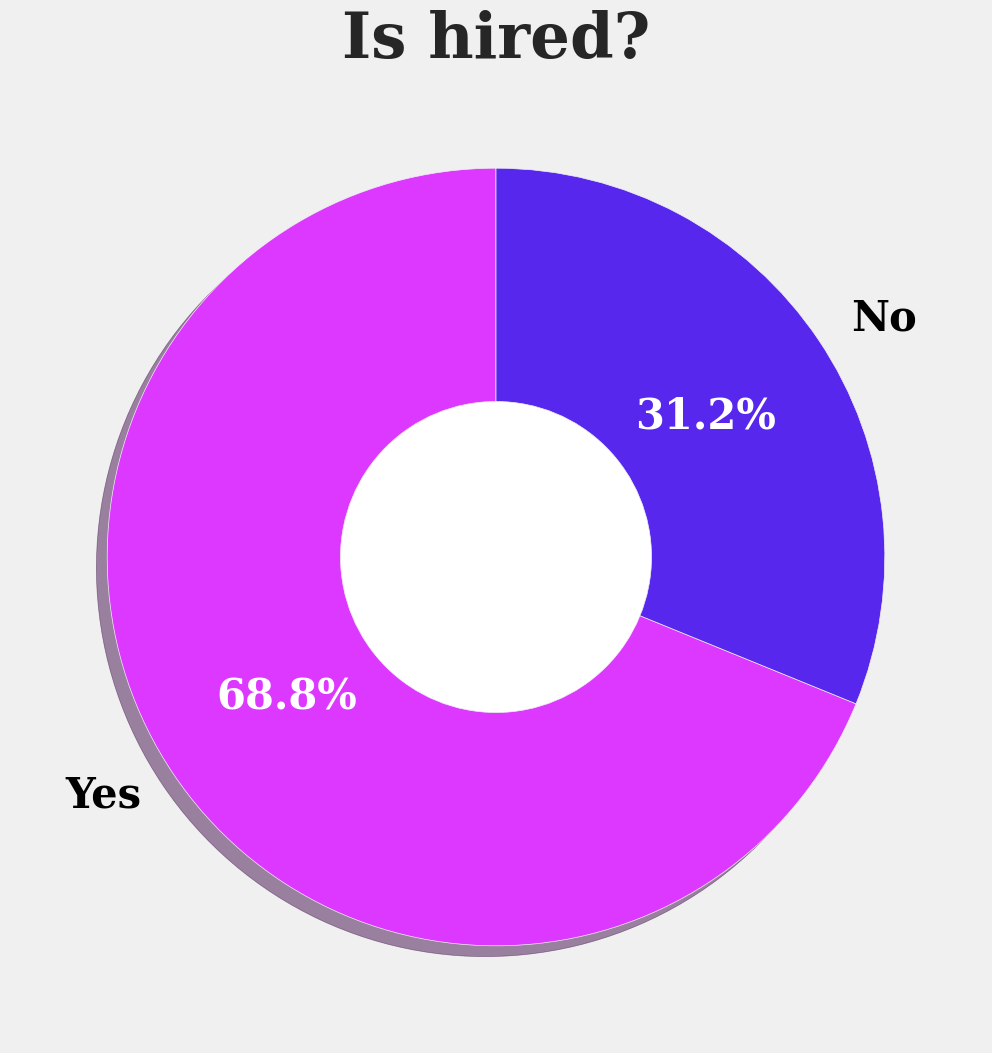

In [7]:
pie_colors = two_colors.copy()

pred_classes = data.status.value_counts()

plt.figure(figsize=(17, 12))
patches, texts, pcts = plt.pie(pred_classes,
                               labels=['Yes', 'No'],
                               colors=pie_colors,
                               pctdistance=0.65,
                               shadow=True,
                               startangle=90,
                               autopct='%1.1f%%',
                               textprops={'fontsize': 30,
                                          'color': 'black',
                                          'weight': 'bold',
                                          'family': 'serif'})
plt.setp(pcts, color='white', size=30)

plt.title('Is hired?', size=45, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

C:\Users\Yasha\AppData\Local\Temp\ipykernel_17788\3953246429.py:10: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




Text(0, 0.5, 'Density')

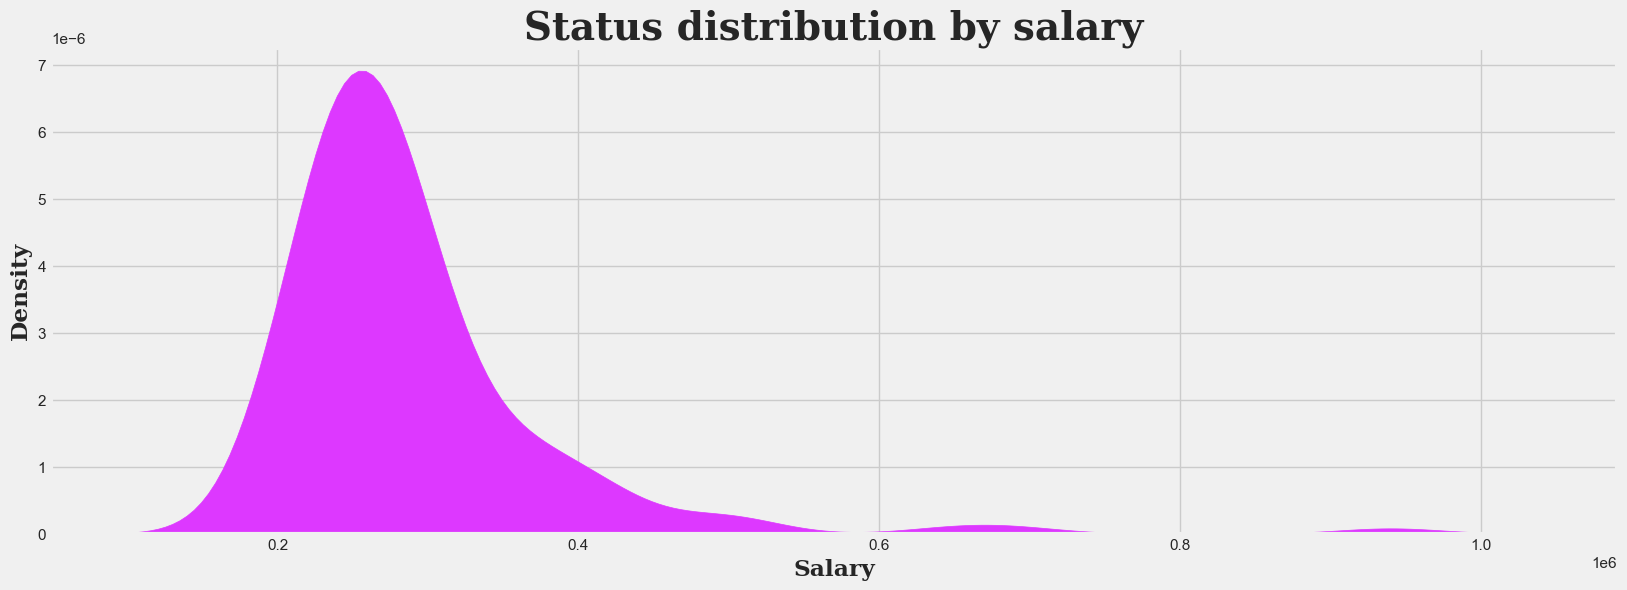

In [8]:
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(111)
plt.title('Status distribution by salary', size=28, **hfont)

# Data without NaN values in salary column
temp_data = data.copy()
temp_data = temp_data.dropna()

# Main plots
sns.kdeplot(data=temp_data,x='salary', shade=True, ax=ax, color=two_colors[0], alpha=1)
plt.xlabel('Salary', **hfont)
plt.ylabel('Density', **hfont)

In [9]:
data.status = data.status.map({'Placed': 1, 'Not Placed': 0})
data.gender = data.gender.map({'M': 1, 'F': 0})

C:\Users\Yasha\AppData\Local\Temp\ipykernel_17788\871578955.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Yasha\AppData\Local\Temp\ipykernel_17788\871578955.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Yasha\AppData\Local\Temp\ipykernel_17788\871578955.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




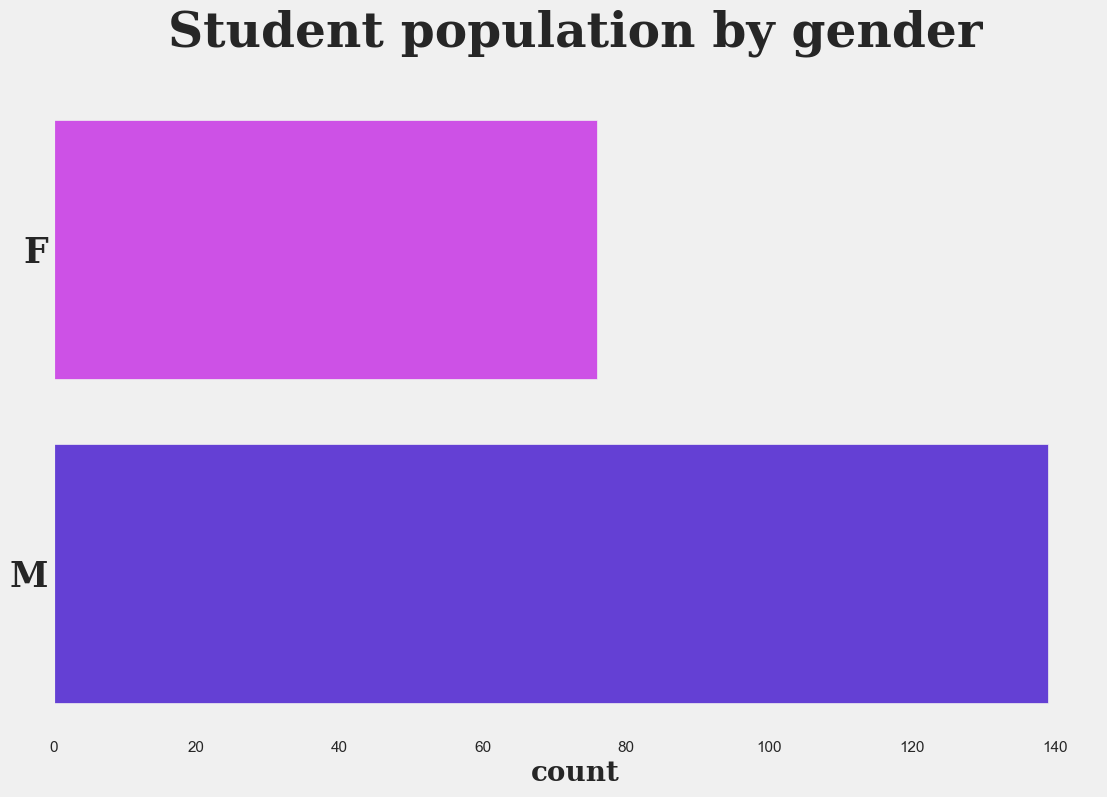

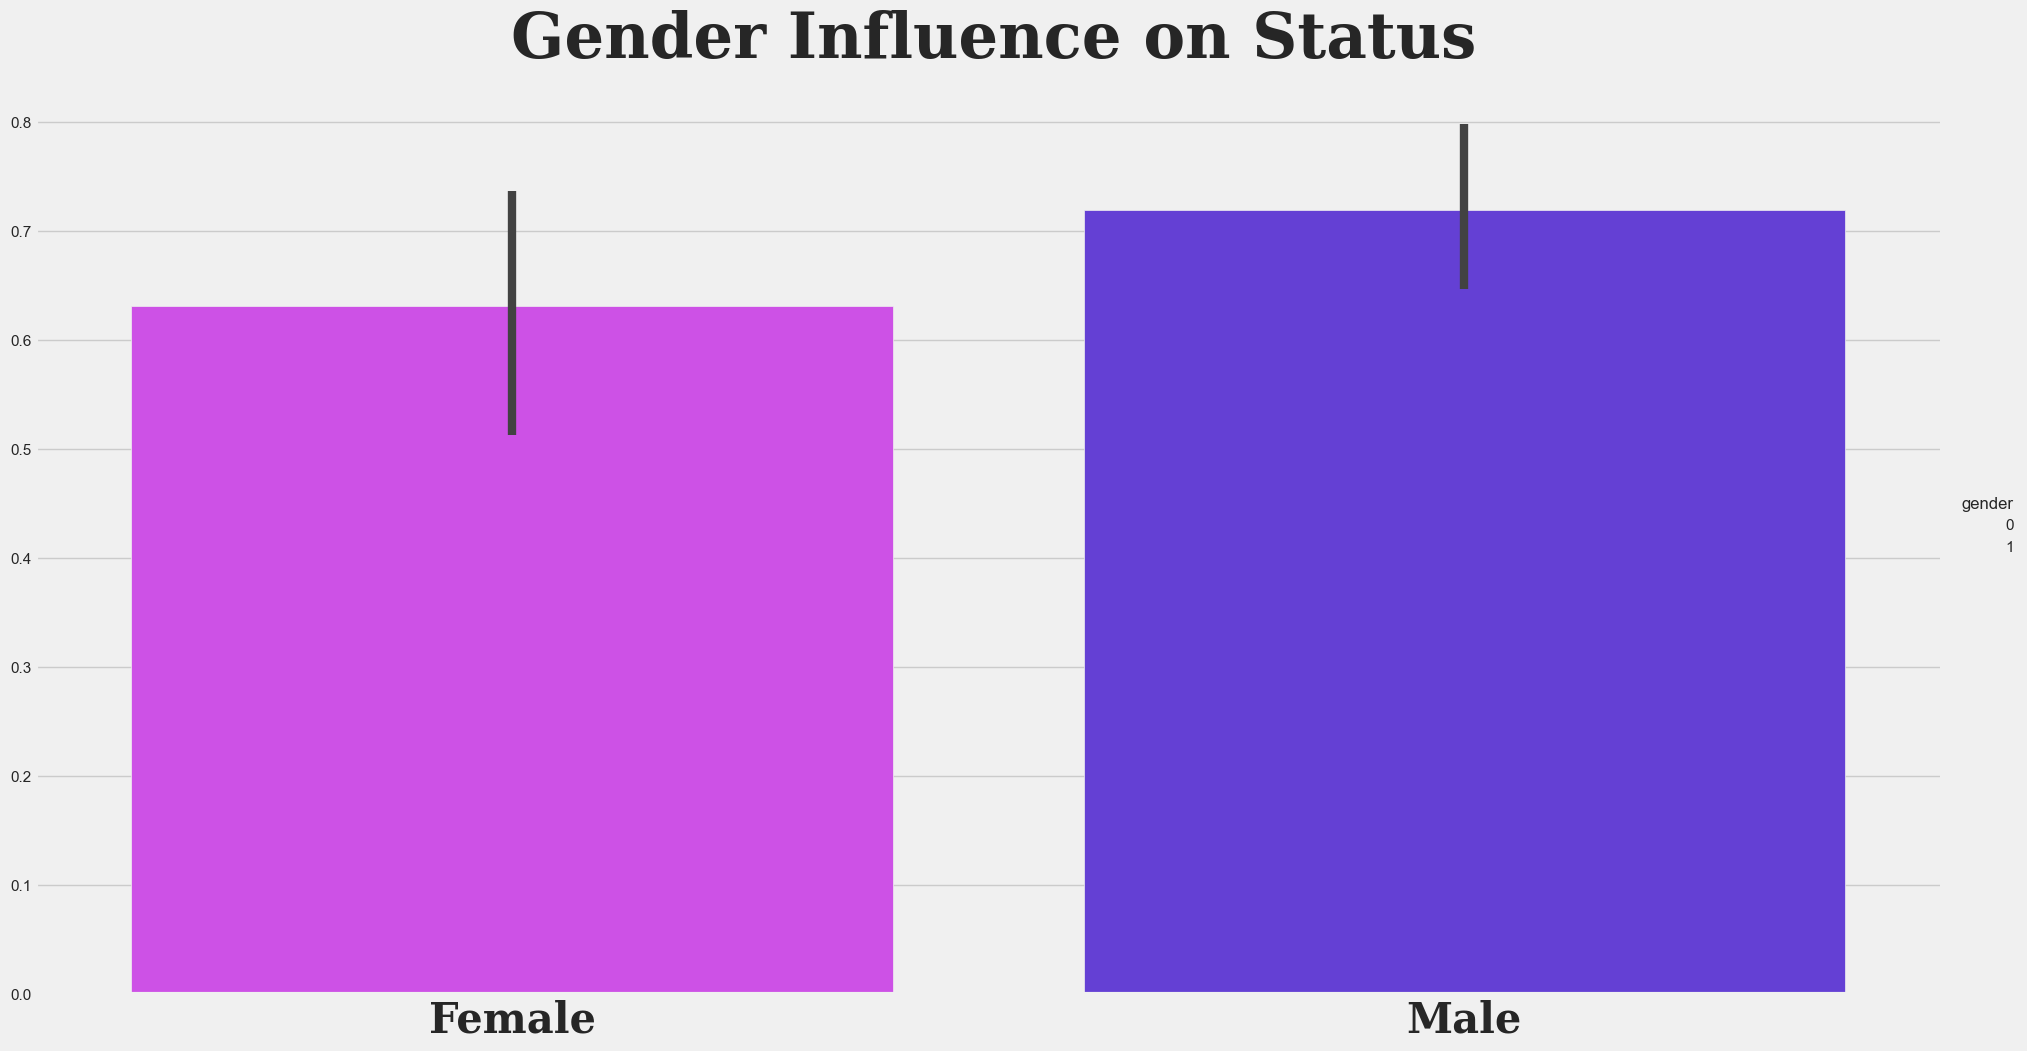

In [10]:
plt.figure(figsize=(12, 8))
gender_plot = sns.countplot(y=data.gender, palette=two_colors)
gender_plot.set_title('Student population by gender', fontsize=35, y=1.05, **hfont)
gender_plot.set(ylabel=None)
plt.grid(False)
gender_plot.set_yticklabels(['F', 'M'], size=25, **hfont)
gender_plot.set_xlabel('count', size=20, **hfont)

gender_plot = sns.catplot(y='status', x='gender', data=data,
                             height=10, aspect=2, kind='bar',
                             palette=two_colors)
gender_plot.set_xticklabels(['Female', 'Male'], size=30, **hfont)
gender_plot.fig.suptitle('Gender Influence on Status',
                            size=45, y=1.05, **hfont)
gender_plot.set(xlabel=None, ylabel=None)

#Conclusion: Male students slightly more often hired

C:\Users\Yasha\AppData\Local\Temp\ipykernel_17788\2289971845.py:17: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Yasha\AppData\Local\Temp\ipykernel_17788\2289971845.py:19: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




'Conclusion:\nVisually looks like on average, the higher a 10th grade, the higher the chance to get a job\n'

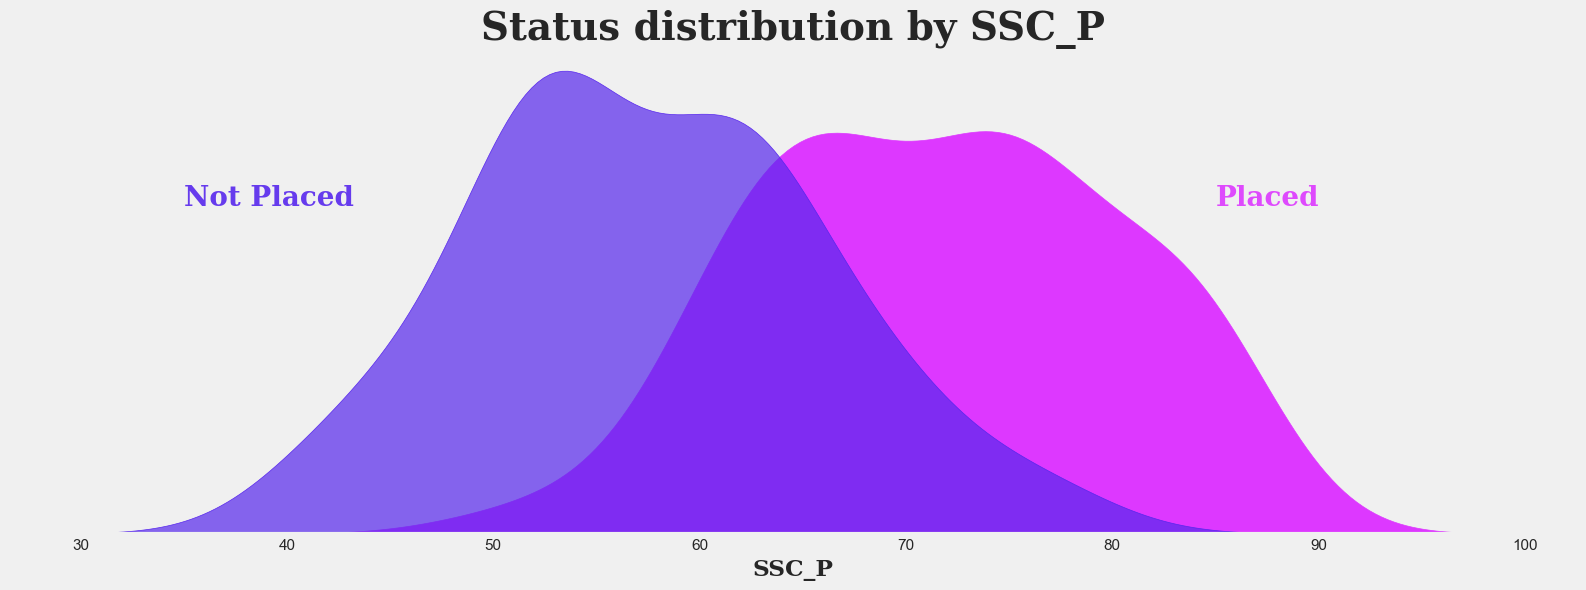

In [11]:
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(111)
plt.title('Status distribution by SSC_P', size=28, **hfont)
ax.grid(False)
ax.axes.get_yaxis().set_visible(False)
ax.text(85, 0.03, 'Placed', {'fontproperties': 'Serif',
                             'size': '20',
                             'weight': 'bold',
                             'color': two_colors[0]},
                             alpha=0.9)

ax.text(35, 0.03, 'Not Placed', {'fontproperties': 'Serif',
                                'size': '20',
                                'weight': 'bold',
                                'color': two_colors[1]}, alpha=0.9)

sns.kdeplot(data=data[data.status == 1],
            x='ssc_p', shade=True, ax=ax, color=two_colors[0], alpha=1)
sns.kdeplot(data=data[data.status == 0],
            x='ssc_p', shade=True, ax=ax, color=two_colors[1], alpha=0.7)
plt.xlabel('SSC_P', **hfont)




placed_group = data[data.status == 1]['ssc_p']
not_placed_group = data[data.status == 0]['ssc_p']

"""Conclusion:
Visually looks like on average, the higher a 10th grade, the higher the chance to get a job
"""

Placed mean:       69.92655405405407
Not Placed mean:   58.3955223880597


C:\Users\Yasha\AppData\Local\Temp\ipykernel_17788\988644233.py:16: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Yasha\AppData\Local\Temp\ipykernel_17788\988644233.py:18: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




'Conclusion:\nVisually looks like there is no difference b/w the groups (both datasets from the same distribution)\nBut when we ran bootstrap-test we found statistically significant differences between groups'

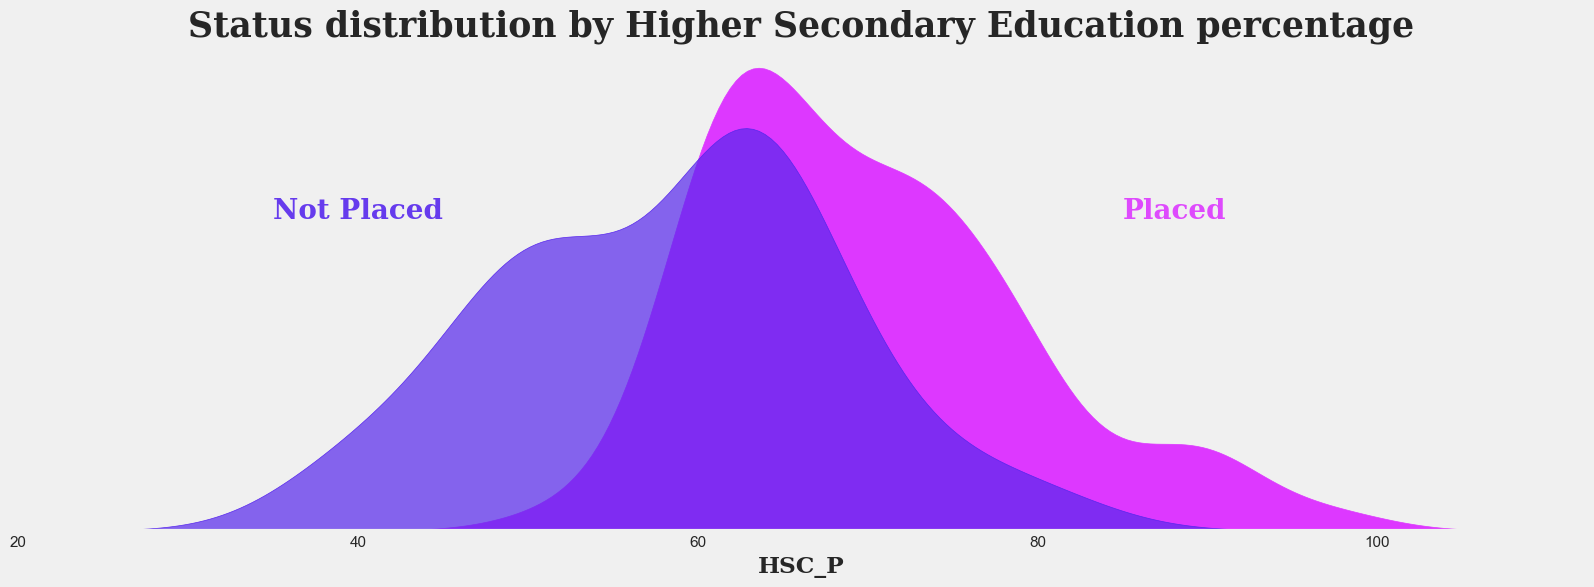

In [12]:
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(111)
plt.title('Status distribution by Higher Secondary Education percentage', size=25, **hfont)
ax.grid(False)
ax.axes.get_yaxis().set_visible(False)
ax.text(85, 0.03, 'Placed', {'fontproperties': 'Serif',
                             'size': '20',
                             'weight': 'bold',
                             'color': two_colors[0]}, alpha=0.9)

ax.text(35, 0.03, 'Not Placed', {'fontproperties': 'Serif',
                                'size': '20',
                                'weight': 'bold',
                                'color': two_colors[1]}, alpha=0.9)

sns.kdeplot(data=data[data.status == 1],
            x='hsc_p', shade=True, ax=ax, color=two_colors[0], alpha=1)
sns.kdeplot(data=data[data.status == 0],
            x='hsc_p', shade=True, ax=ax, color=two_colors[1], alpha=0.7)
plt.xlabel('HSC_P', **hfont)

print(f'Placed mean:       {data[data.status == 1]["hsc_p"].mean()}')
print(f'Not Placed mean:   {data[data.status == 0]["hsc_p"].mean()}')

"""Conclusion:
Visually looks like there is no difference b/w the groups (both datasets from the same distribution)
But when we ran bootstrap-test we found statistically significant differences between groups"""

Placed mean:       68.74054054054054
Not Placed mean:   61.13417910447761


C:\Users\Yasha\AppData\Local\Temp\ipykernel_17788\1353769684.py:25: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Yasha\AppData\Local\Temp\ipykernel_17788\1353769684.py:27: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




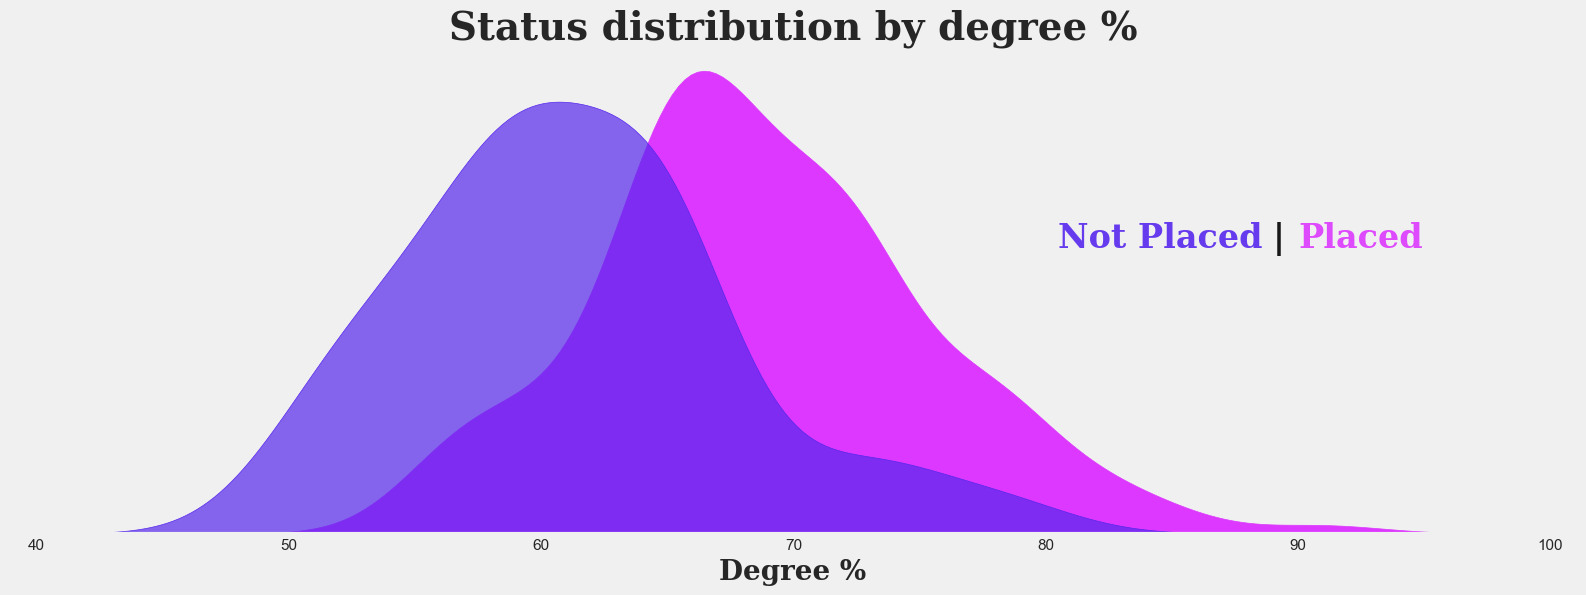

In [13]:
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(111)
plt.title(f'Status distribution by degree %', size=28, **hfont)
ax.grid(False)
ax.axes.get_yaxis().set_visible(False)

height = 0.04

ax.text(90, height, 'Placed', {'fontproperties': 'Serif',
                              'size': '24',
                              'weight': 'bold',
                              'color': two_colors[0]}, alpha=0.9)

ax.text(89, height, '|', {'fontproperties': 'Serif',
                         'size': '24',
                         'weight': 'bold',
                         'color': 'black'}, alpha=0.9)

ax.text(80.5, height, 'Not Placed', {'fontproperties': 'Serif',
                               'size': '24',
                               'weight': 'bold',
                               'color': two_colors[1]}, alpha=0.9)


sns.kdeplot(data.degree_p[data.status == 1], shade=True, ax=ax, color=two_colors[0],
            alpha=1)
sns.kdeplot(data.degree_p[data.status == 0], shade=True, ax=ax, color=two_colors[1],
            alpha=0.7)

plt.xlabel('Degree %', size=20, **hfont)

print(f'Placed mean:       {data[data.status == 1]["degree_p"].mean()}')
print(f'Not Placed mean:   {data[data.status == 0]["degree_p"].mean()}')

C:\Users\Yasha\AppData\Local\Temp\ipykernel_17788\2924388394.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Yasha\AppData\Local\Temp\ipykernel_17788\2924388394.py:2: UserWarning:


The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.

C:\Users\Yasha\AppData\Local\Temp\ipykernel_17788\2924388394.py:7: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Yasha\AppData\Local\Temp\ipykernel_17788\2924388394.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Yasha\AppData\Local\Temp\ipykernel_17788\2924388394.py:13: UserWarning:

The palette list has

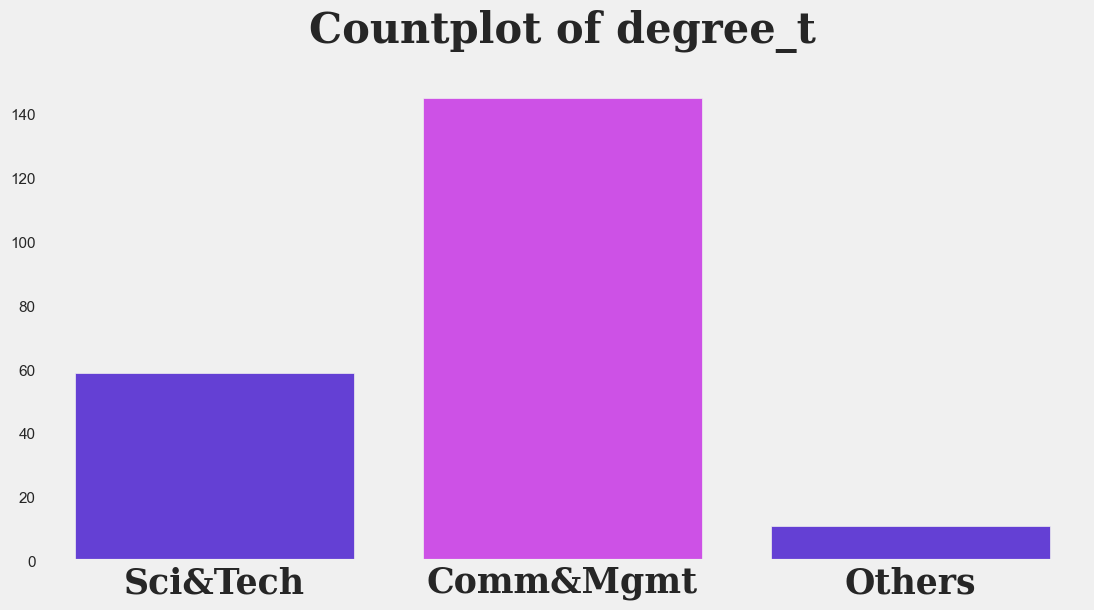

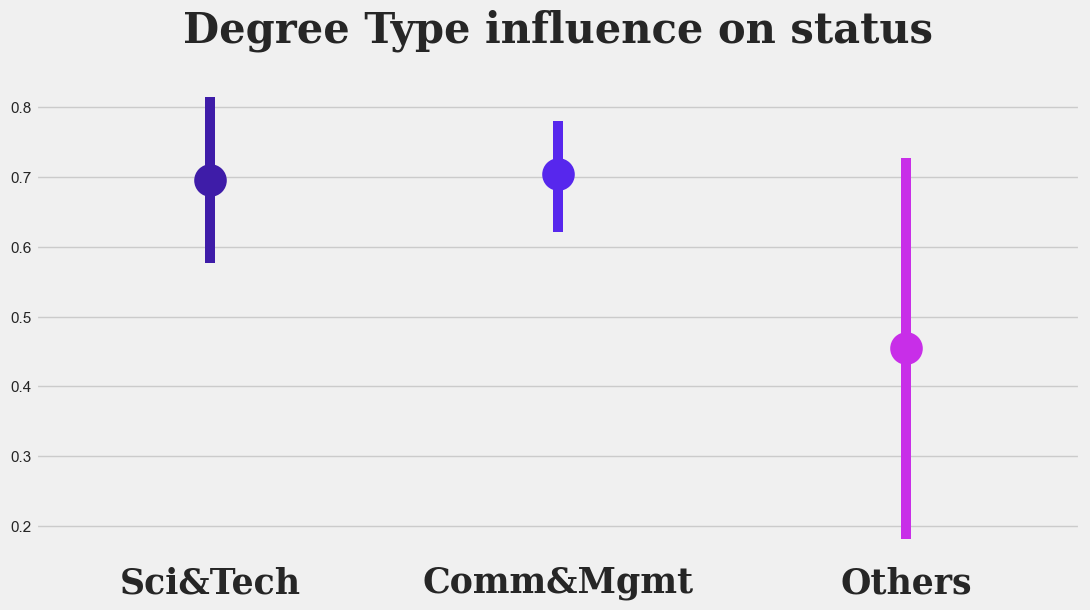

In [14]:
plt.figure(figsize=(12, 6))
degree_t_plot = sns.countplot(x=data.degree_t, palette=two_colors[::-1])
degree_t_plot.set_title('Countplot of degree_t',
                      fontsize=30, y=1.05, **hfont)
degree_t_plot.set(xlabel=None, ylabel=None)
plt.grid(False)
degree_t_plot.set_xticklabels(data.degree_t.unique(), size=25, **hfont)



fig = plt.figure(figsize=(12, 6))

degree_type_plot = sns.pointplot(x=data.degree_t, y='status', data=data, palette=five_colors)

degree_type_plot.set_title('Degree Type influence on status', fontsize=30, y=1.05, **hfont)
degree_type_plot.set(xlabel=None,
                     ylabel=None)
degree_type_plot.set_xticklabels(data.degree_t.unique(), size=25, **hfont)


data.degree_t.unique()


data.degree_t = data.degree_t.map({'Sci&Tech': 1, 'Comm&Mgmt': 2, 'Others': 3}) 

workex
No     141
Yes     74
Name: count, dtype: int64


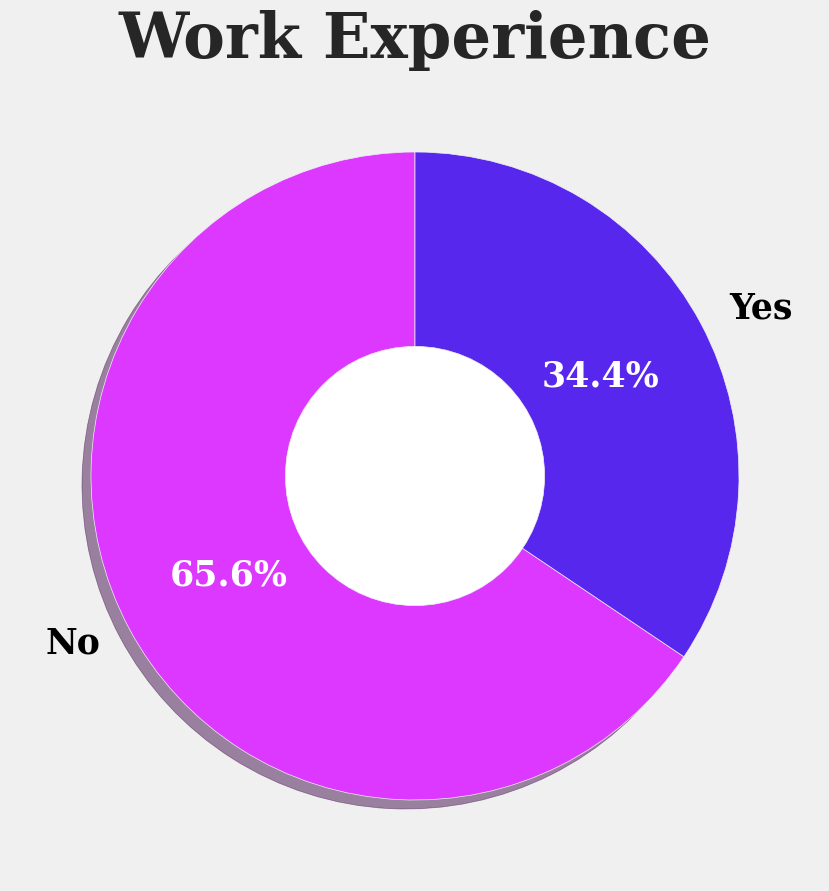

In [15]:
workex_data = data.workex.value_counts()
print(workex_data)

explode = (0.1, 0.1)
plt.figure(figsize=(14, 10))
patches, texts, pcts = plt.pie(workex_data,
                               labels=workex_data.index,
                               colors=pie_colors,
                               pctdistance=0.65,
                               shadow=True,
                               startangle=90,
                               autopct='%1.1f%%',
                               textprops={ 'fontsize': 25,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' })
plt.setp(pcts, color='white')

hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Work Experience', size=45, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

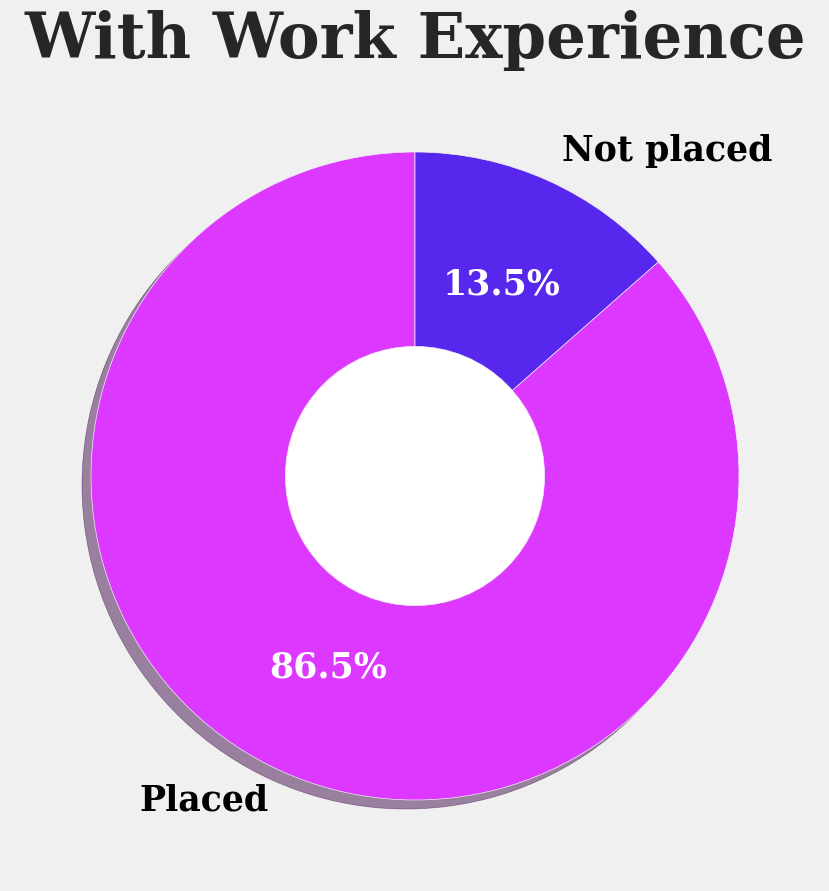

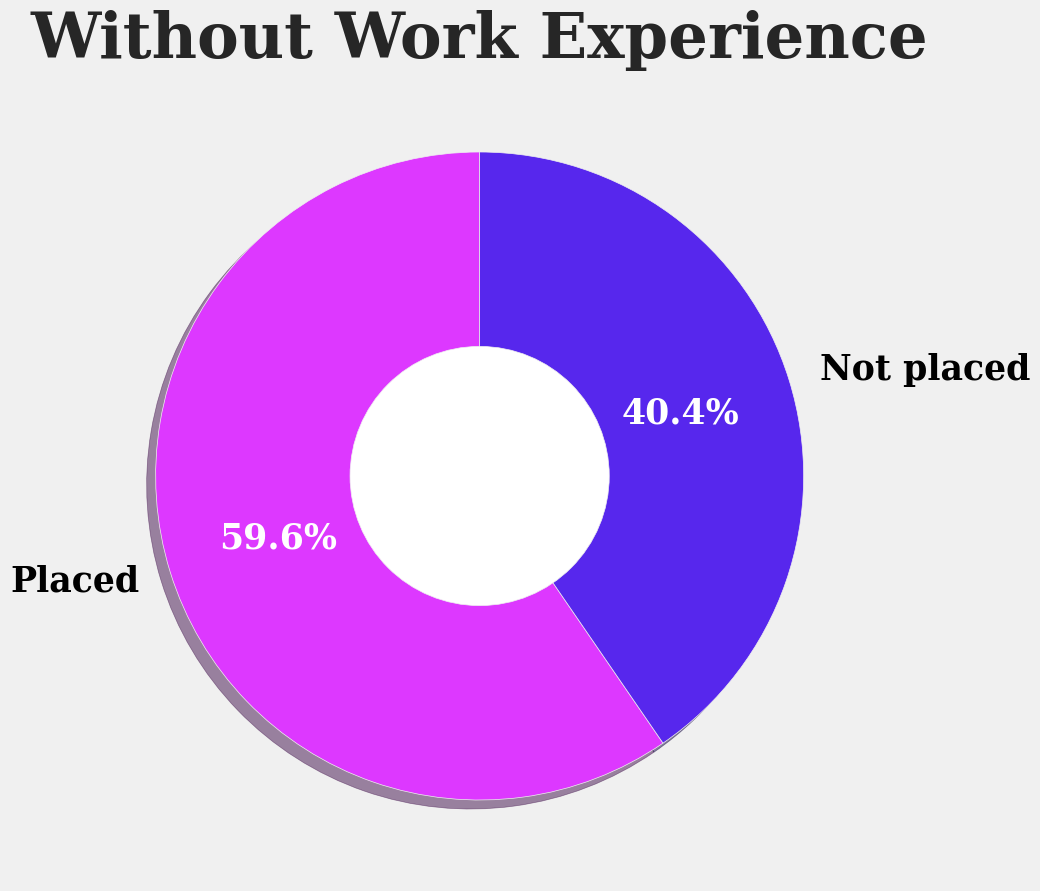

In [16]:
#Work experience

true = data[data.workex=="Yes"] #Students with work experience
false = data[data.workex=="No"] #Students without work experience

#Analysis of students with work experience
true_workex_data = true.status.value_counts()

explode = (0.1, 0.1)
plt.figure(figsize=(14, 10))
patches, texts, pcts = plt.pie(true_workex_data,
                               labels=['Placed', 'Not placed'],
                               colors=pie_colors,
                               pctdistance=0.65,
                               shadow=True,
                               startangle=90,
                               autopct='%1.1f%%',
                               textprops={ 'fontsize': 25,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' })
plt.setp(pcts, color='white')

hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('With Work Experience', size=45, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

#Analysis of students without work experience
false_workex_data = false.status.value_counts()

explode = (0.1, 0.1)
plt.figure(figsize=(14, 10))
patches, texts, pcts = plt.pie(false_workex_data,
                               labels=['Placed', 'Not placed'],
                               colors=pie_colors,
                               pctdistance=0.65,
                               shadow=True,
                               startangle=90,
                               autopct='%1.1f%%',
                               textprops={ 'fontsize': 25,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' })
plt.setp(pcts, color='white')

hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Without Work Experience', size=45, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

#This tells us that students with work exeprience are much more likely to get placed than those 
#without work experience

C:\Users\Yasha\AppData\Local\Temp\ipykernel_17788\3362918961.py:25: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Yasha\AppData\Local\Temp\ipykernel_17788\3362918961.py:27: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




Text(0.5, 0, 'test results')

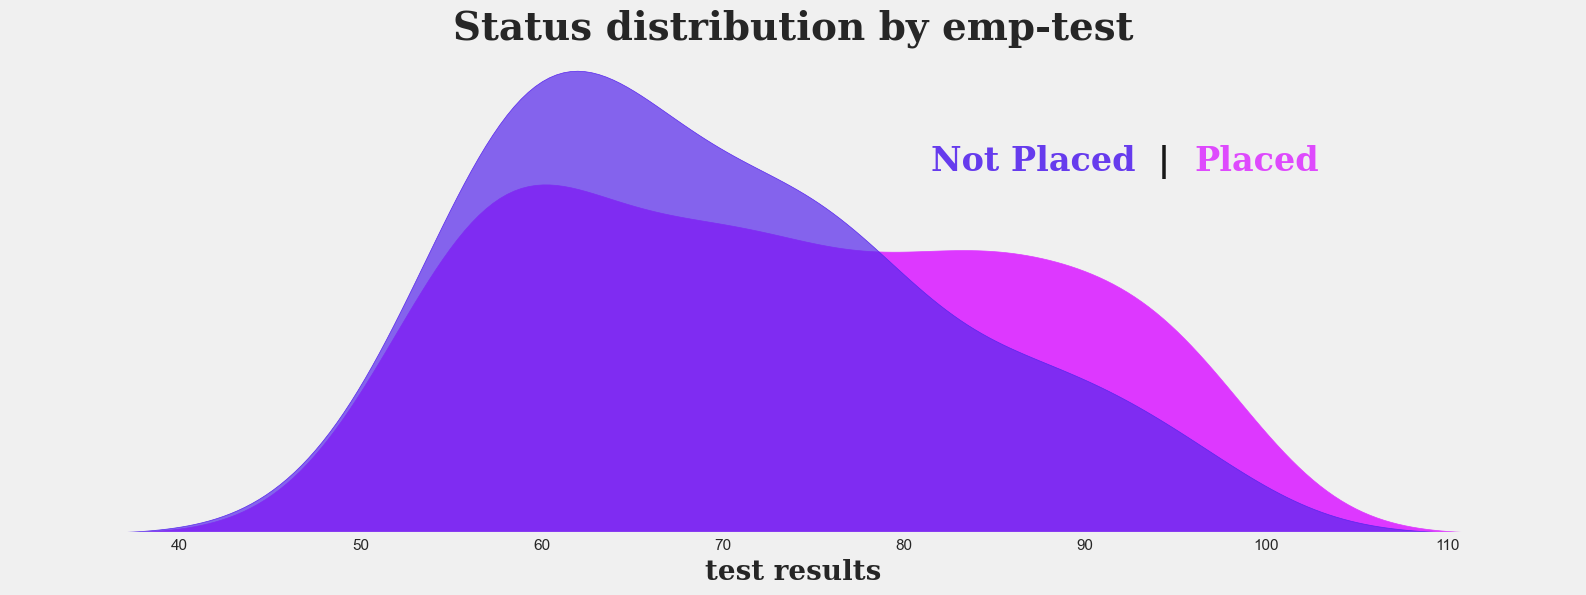

In [17]:
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(111)
plt.title(f'Status distribution by emp-test', size=28, **hfont)
ax.grid(False)
ax.axes.get_yaxis().set_visible(False)

height = 0.025

ax.text(96, height, 'Placed', {'fontproperties': 'Serif',
                               'size': '24',
                               'weight': 'bold',
                               'color': two_colors[0]}, alpha=0.9)

ax.text(94, height, '|', {'fontproperties': 'Serif',
                          'size': '24',
                          'weight': 'bold',
                          'color': 'black'}, alpha=0.9)

ax.text(81.5, height, 'Not Placed', {'fontproperties': 'Serif',
                                     'size': '24',
                                     'weight': 'bold',
                                     'color': two_colors[1]}, alpha=0.9)


sns.kdeplot(data.etest_p[data.status == 1], shade=True, ax=ax, color=two_colors[0],
            alpha=1)
sns.kdeplot(data.etest_p[data.status == 0], shade=True, ax=ax, color=two_colors[1],
            alpha=0.7)

plt.xlabel('test results', size=20, **hfont)

#For those who got 60, not placed is more than placed. Similarly for 90 it is opposite

C:\Users\Yasha\AppData\Local\Temp\ipykernel_17788\3136050132.py:20: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Yasha\AppData\Local\Temp\ipykernel_17788\3136050132.py:22: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




Text(0.5, 0, 'MBA %')

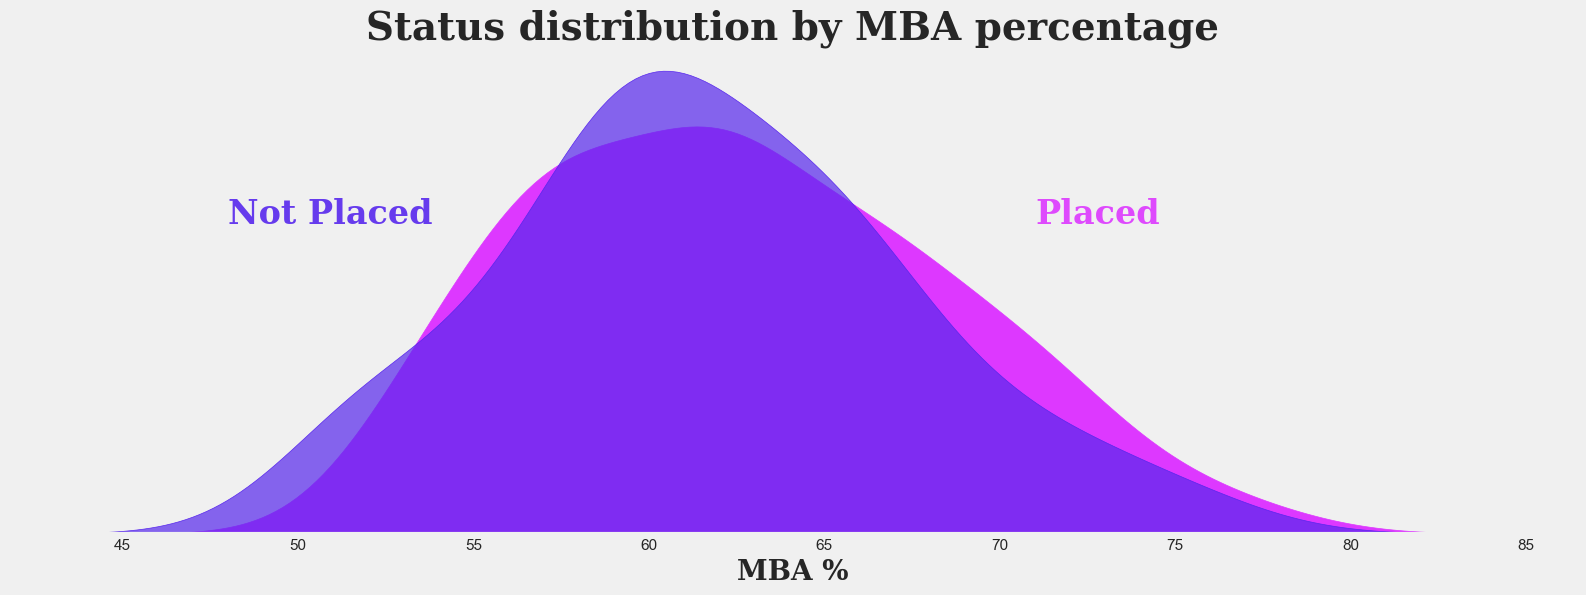

In [18]:
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(111)
plt.title(f'Status distribution by MBA percentage', size=28, **hfont)
ax.grid(False)
ax.axes.get_yaxis().set_visible(False)

height = 0.045

ax.text(71, height, 'Placed', {'fontproperties': 'Serif',
                               'size': '24',
                               'weight': 'bold',
                               'color': two_colors[0]}, alpha=0.9)

ax.text(48, height, 'Not Placed', {'fontproperties': 'Serif',
                                     'size': '24',
                                     'weight': 'bold',
                                     'color': two_colors[1]}, alpha=0.9)


sns.kdeplot(data.mba_p[data.status == 1], shade=True, ax=ax, color=two_colors[0],
            alpha=1)
sns.kdeplot(data.mba_p[data.status == 0], shade=True, ax=ax, color=two_colors[1],
            alpha=0.7)

plt.xlabel('MBA %', size=20, **hfont)

#Skills and street-smartness is much more important than just mba percentage. A lot of other factors
#come into play like communication and mgmt skills rather than just marks.